# Preprocessing
* kaggle에서 폐사진 데이터 다운로드(2d_images.zip, 2d_masks.zip)
* https://www.kaggle.com/kmader/finding-lungs-in-ct-data
* 모든 tif 이미지읽어서 np로 변환
* y데이터는 0~1사이로 스케일링
* train, val split

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize

import os, glob

In [15]:
img_list = sorted(glob.glob('dataset/2d_images/*.tif'))
mask_list = sorted(glob.glob('dataset/2d_masks/*.tif'))

print(len(img_list), len(mask_list))

267 267


### 이미지 데이터 to np

(267, 256, 256, 1)
(267, 256, 256, 1)
픽셀값
x: 4158.7964 -2574.3472
y: 255.0 0.0
원본: (256, 256, 1)
squeeze 후: (256, 256)


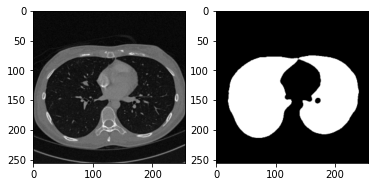

In [16]:
IMG_SIZE = 256

x_data, y_data = np.empty((2, len(img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
print(x_data.shape)    # (267, 256, 256, 1)  B, H, W, C
print(y_data.shape)

for i, img_path in enumerate(img_list):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    x_data[i] = img
    
for i, img_path in enumerate(mask_list):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    y_data[i] = img

print('픽셀값')
print('x:', x_data.max(), x_data.min())
print('y:', y_data.max(), y_data.min())
y_data /= 255.              # 0~1 사이로 맞춰줌

fig, ax = plt.subplots(1, 2)
print('원본:', x_data[12].shape)
print('squeeze 후:', x_data[12].squeeze().shape)
ax[0].imshow(x_data[12].squeeze(), cmap='gray')
ax[1].imshow(y_data[12].squeeze(), cmap='gray')

### npy 로 저장

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1)

np.save('dataset/x_train.npy', x_train)
np.save('dataset/y_train.npy', y_train)
np.save('dataset/x_val.npy', x_val)
np.save('dataset/y_val.npy', y_val)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)
